In [130]:
import os
import requests
import zipfile
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, Subset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import PIL
import matplotlib.pyplot as plt
import numpy as np
import random

In [79]:
# Destination folder of our images
download_path = "sketches_png.zip"
extracted_path = "sketches_png"

# Check if the folder is already downloaded
if not os.path.exists(extracted_path):
    # Define the URL and the download path
    url = "http://cybertron.cg.tu-berlin.de/eitz/projects/classifysketch/sketches_png.zip"
    
    # Download the zip file
    response = requests.get(url)
    with open(download_path, 'wb') as file:
        file.write(response.content)
    
    # Extract the zip file
    with zipfile.ZipFile(download_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_path)
        
    print(f"Folder '{extracted_path}' downloaded.")
else:
    print(f"Folder '{extracted_path}' already downloaded.")

Folder 'sketches_png' already downloaded.


In [80]:
# Define transformations

norm_mean = 0
norm_stddev = 1

transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to a fixed size
    transforms.ToTensor(),          # Convert images to tensor
    transforms.Normalize((norm_mean,), (norm_stddev,)),  # Normalize
])

In [132]:
#split data into train and test subset
BATCH_SIZE_TRAIN = 1024
BATCH_SIZE_TEST = 1000

root_path = extracted_path + "/png"
dataset = datasets.ImageFolder(root=root_path, transform=transform)

image_paths = [dataset.imgs[i][0] for i in range(len(dataset))]
labels = [dataset.imgs[i][1] for i in range(len(dataset))]
train_indices, test_indices = train_test_split(range(len(dataset)), test_size = 0.2, stratify=labels, random_state=42)
train_subset = Subset(dataset, train_indices)
test_subset = Subset(dataset, test_indices)

train_loader = DataLoader(train_subset, batch_size=BATCH_SIZE_TRAIN, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=BATCH_SIZE_TEST, shuffle=True)

In [133]:
print(f"Len of whole dataset: {len(dataset)}")
print(f"Len of train dataset: {len(train_loader.dataset)}\nLen of test dataset: {len(test_loader.dataset)}")

Len of whole dataset: 20001
Len of train dataset: 16000
Len of test dataset: 4001


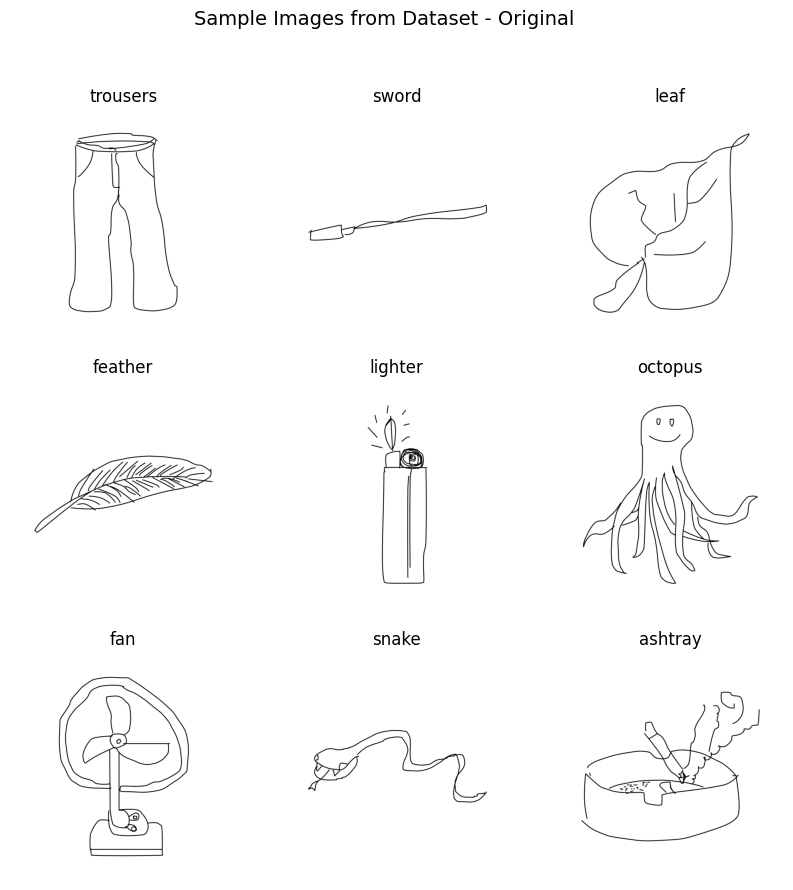

In [134]:
samples = random.sample(dataset.imgs, 9)

plt.figure(figsize=(10, 10))
i = 0
for image, label_idx in samples:
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(PIL.Image.open(image), cmap='gray')
    plt.title(dataset.classes[label_idx])
    plt.axis("off")
    i += 1
plt.suptitle('Sample Images from Dataset - Original', fontsize=14)
plt.show()

In [135]:
images, labels = next(iter(test_loader))

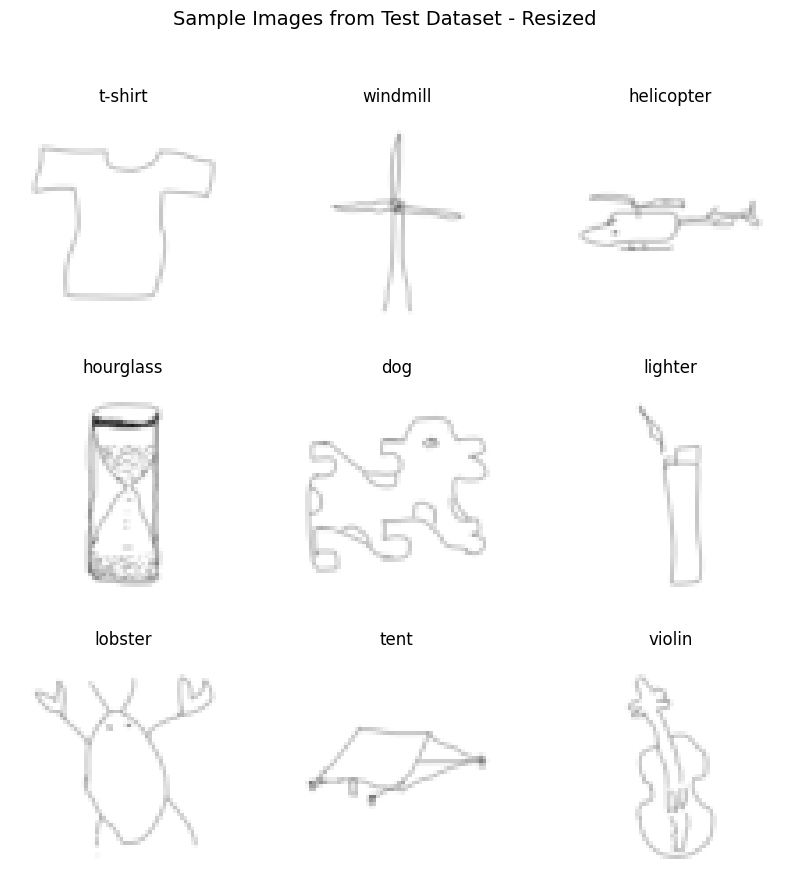

In [136]:
samples = list(zip(images, labels))
samples = random.sample(samples, 9)

mean = [norm_mean, norm_mean, norm_mean]  
std = [norm_stddev, norm_stddev, norm_stddev] 

plt.figure(figsize=(10, 10))
i = 0
for image, label in samples:
    ax = plt.subplot(3, 3, i + 1)
    
    img = image.numpy().transpose((1, 2, 0))
    img = std * img + mean
    img = np.clip(img, 0, 1)
    
    plt.imshow(img, cmap='gray')
    plt.title(train_dataset.dataset.classes[label.item()])
    plt.axis("off")
    i += 1
plt.suptitle('Sample Images from Test Dataset - Resized', fontsize=14)
plt.show()